# Cluster Analysis

This notebook analyzes the results of different clustering algorithms applied to the client features dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Set plot style
sns.set_style("whitegrid")

## Load Data

In [2]:
df = pd.read_csv('../data/04-processed/client_features.csv')
df.head()

,average_of_days_per_routine,routines_count,gender_encoded,months_diff,kmeans_cluster_2,kmeans_cluster_3,dbscan_cluster,hierarchical_cluster
0,1.000000,4,0,5,1,2,0,0
1,2.357143,28,0,37,0,0,-1,1
2,3.500000,6,0,9,1,2,0,0
3,2.625000,32,1,37,0,0,-1,1
4,1.736842,19,0,36,0,0,-1,1


## Feature Distribution by Cluster

We will look at how the features (`average_of_days_per_routine`, `routines_count`, `months_diff`) are distributed across different clusters.

### K-Means (2 Clusters)

kmeans_cluster_2
1    469
0    136
Name: count, dtype: int64


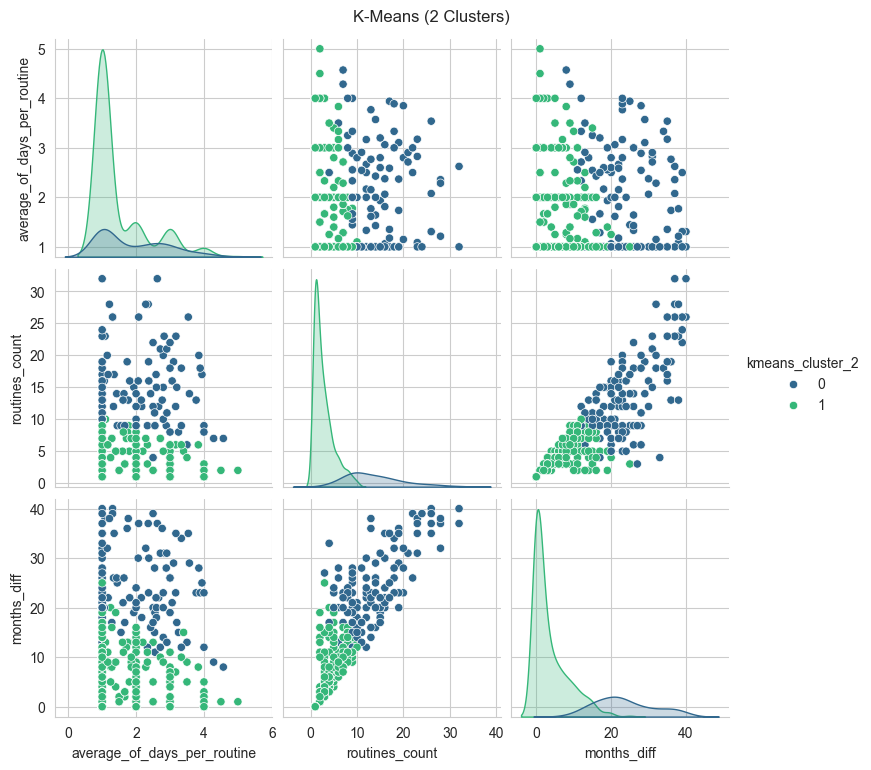

In [3]:
print(df['kmeans_cluster_2'].value_counts())

sns.pairplot(df, hue='kmeans_cluster_2', vars=['average_of_days_per_routine', 'routines_count', 'months_diff'], palette='viridis')
plt.suptitle('K-Means (2 Clusters)', y=1.02)
plt.show()

### K-Means (3 Clusters)

kmeans_cluster_3
1    287
2    216
0    102
Name: count, dtype: int64


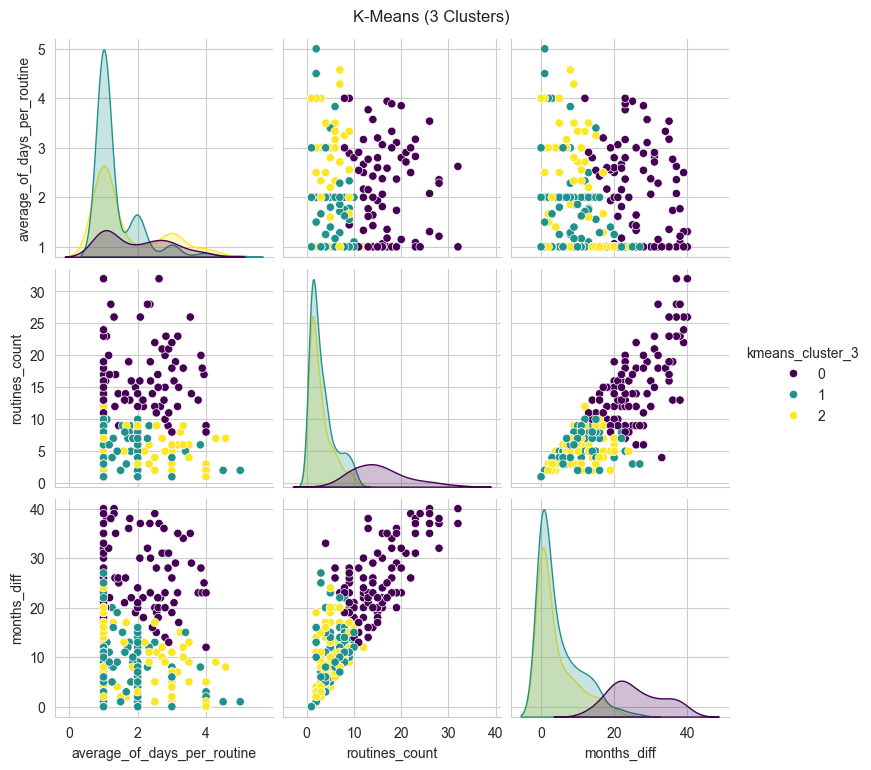

In [4]:
print(df['kmeans_cluster_3'].value_counts())

sns.pairplot(df, hue='kmeans_cluster_3', vars=['average_of_days_per_routine', 'routines_count', 'months_diff'], palette='viridis')
plt.suptitle('K-Means (3 Clusters)', y=1.02)
plt.show()

### DBSCAN

#### K-Distance Graph (Parameter Tuning)
This graph was used to determine the optimal epsilon.

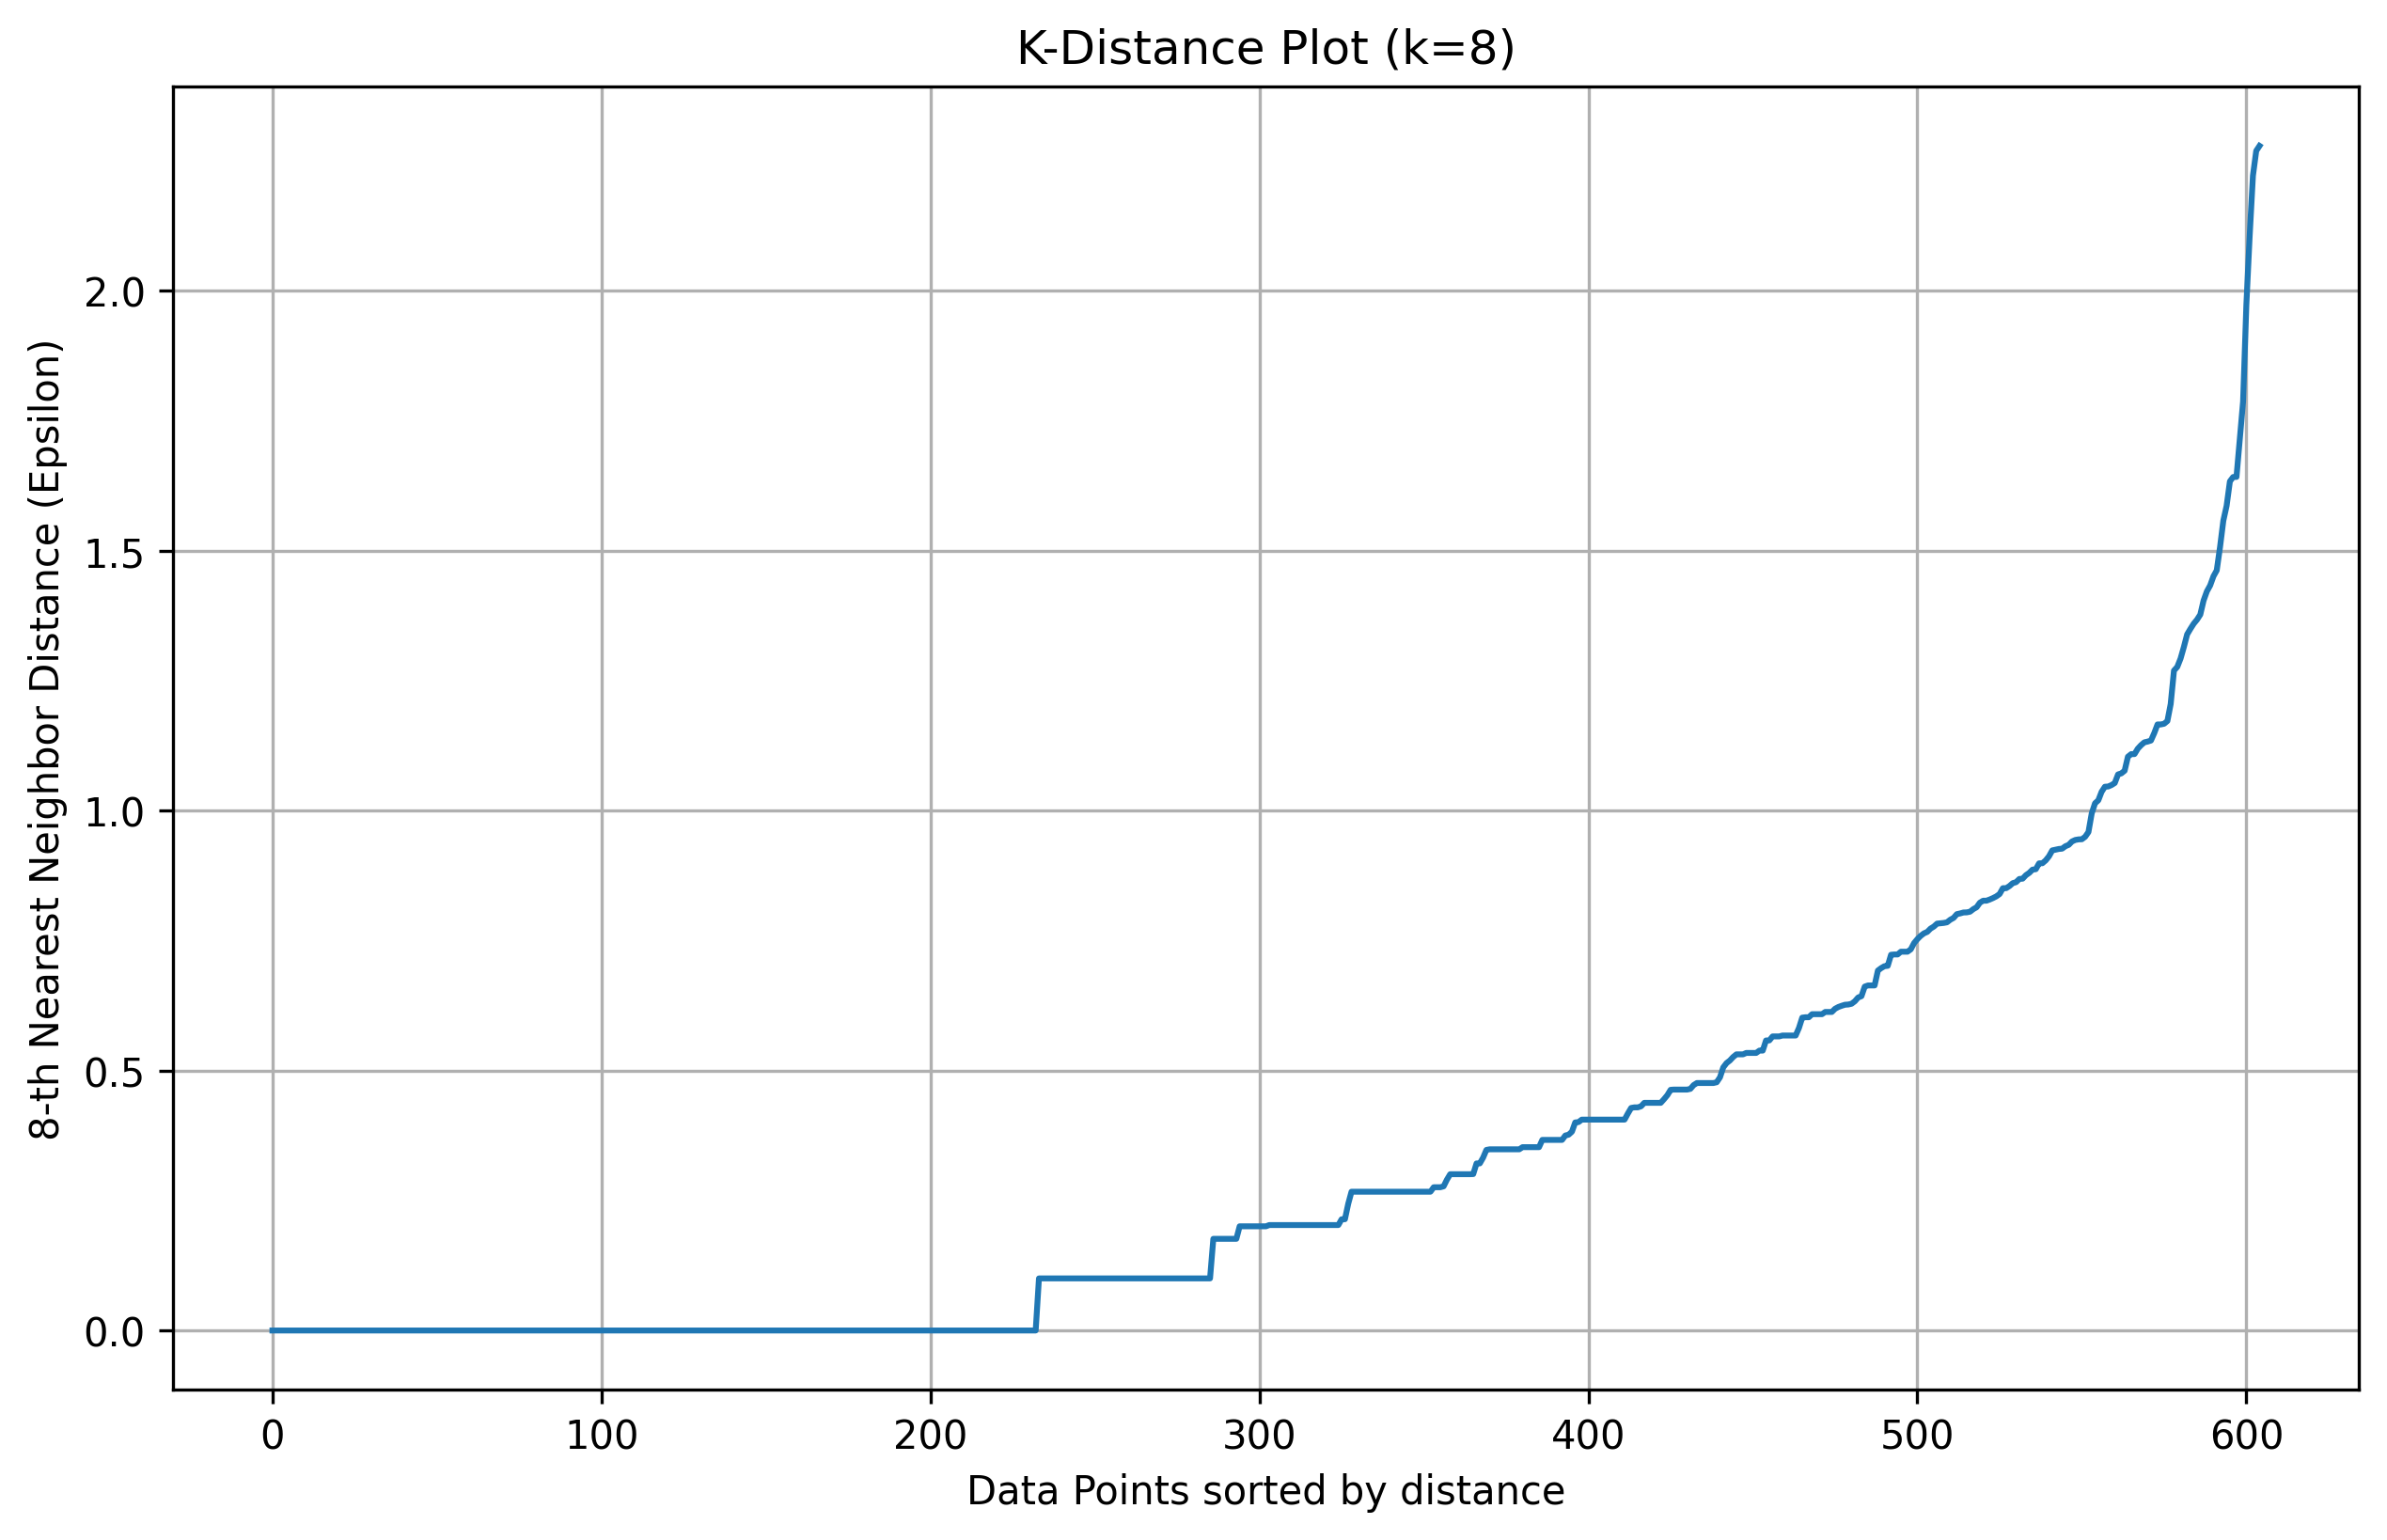

In [5]:
try:
    display(Image(filename='../data/05-clustering/dbscan_k_distance.png'))
except FileNotFoundError:
    print("Image not found.")

#### Cluster Distribution

dbscan_cluster
 1    299
 0    231
-1     75
Name: count, dtype: int64


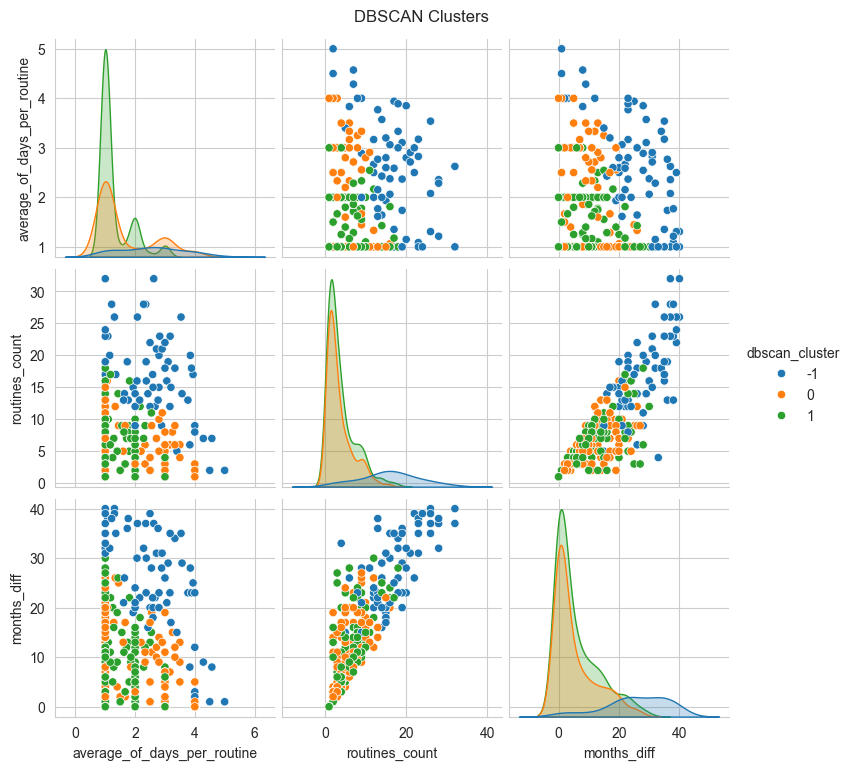

In [6]:
print(df['dbscan_cluster'].value_counts())

# Filter out noise for visualization if needed, or keep it to see where outliers are
sns.pairplot(df, hue='dbscan_cluster', vars=['average_of_days_per_routine', 'routines_count', 'months_diff'], palette='tab10')
plt.suptitle('DBSCAN Clusters', y=1.02)
plt.show()

### Hierarchical Clustering

#### Cluster Distribution

hierarchical_cluster
2    307
0    241
1     57
Name: count, dtype: int64


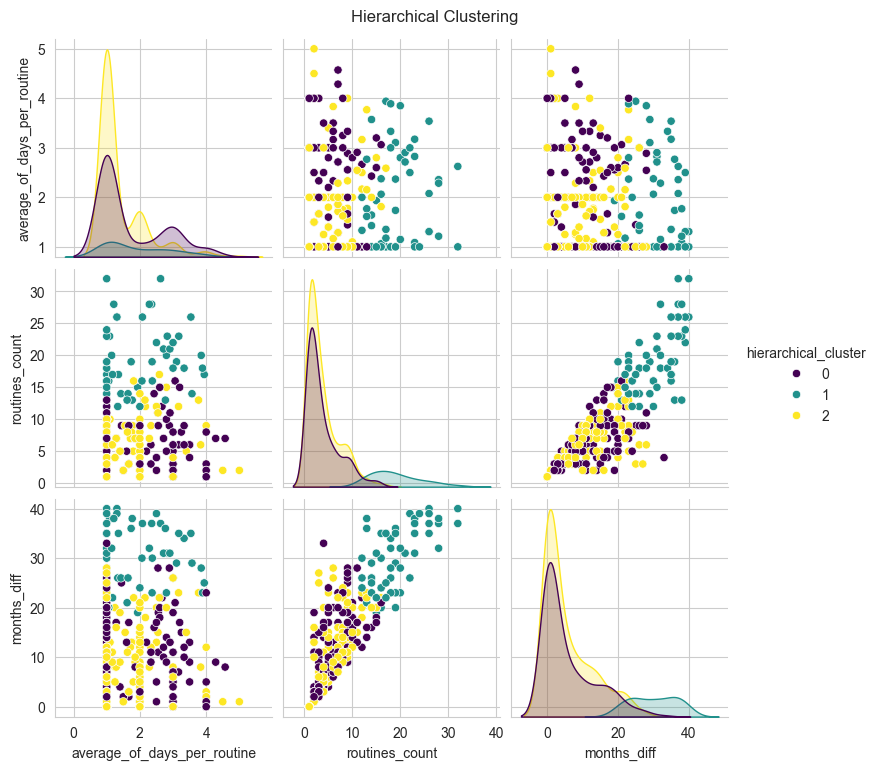

In [8]:
print(df['hierarchical_cluster'].value_counts())

sns.pairplot(df, hue='hierarchical_cluster', vars=['average_of_days_per_routine', 'routines_count', 'months_diff'], palette='viridis')
plt.suptitle('Hierarchical Clustering', y=1.02)
plt.show()